In [ ]:
# Imports
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import seaborn as sns
import os
import pytz
import re

from pandas.tseries.holiday import USFederalHolidayCalendar
from datetime import datetime
from pathlib import Path

In [2]:
# Setting up the subfolder to store sentiment data

project_root = Path.cwd().parent
sentiment_data_path = project_root / "data" / "sentiment-data"
sentiment_data_path.mkdir(exist_ok=True)

In [3]:
os.listdir(sentiment_data_path)

['cleaned_datasets',
 'combined_headlines_clean.csv',
 'combined_headlines_raw.csv',
 'targetted_combined_headlines.csv']

In [4]:
len(os.listdir(sentiment_data_path))

4

In [ ]:
for datasets in os.listdir(sentiment_data_path):
    df = pd.read_csv(sentiment_data_path / f"{datasets}")

    print(f"{datasets}")
    print("Columns:", df.columns.tolist())
    print("Shape:", df.shape)
    print("Null Values:\n", df.isnull().sum())
    print("Info:\n", df.info())
    print("First Few Rows:\n", df.head())

In [ ]:
# All_external.csv
# Columns: ['Date', 'Article_title', 'Stock_symbol', 'Url', 'Publisher', 'Author', 'Article', 'Lsa_summary', 'Luhn_summary', 'Textrank_summary', 'Lexrank_summary', 'Unnamed: 11', 'Unnamed: 12']
# Shape: (6793, 13)
# Null Values:
#  Date                   0
# Article_title          0
# Stock_symbol           0
# Url                    0
# Publisher              0
# Author              6793
# Article             6793
# Lsa_summary         6793
# Luhn_summary        6793
# Textrank_summary    6793
# Lexrank_summary     6793
# Unnamed: 11         6793
# Unnamed: 12            0
# dtype: int64
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 6793 entries, 0 to 6792
# Data columns (total 13 columns):
#  #   Column            Non-Null Count  Dtype  
# ---  ------            --------------  -----  
#  0   Date              6793 non-null   object 
#  1   Article_title     6793 non-null   object 
#  2   Stock_symbol      6793 non-null   object 
#  3   Url               6793 non-null   object 
#  4   Publisher         6793 non-null   object 
#  5   Author            0 non-null      float64
#  6   Article           0 non-null      float64
#  7   Lsa_summary       0 non-null      float64
#  8   Luhn_summary      0 non-null      float64
#  9   Textrank_summary  0 non-null      float64
#  10  Lexrank_summary   0 non-null      float64
#  11  Unnamed: 11       0 non-null      float64
#  12  Unnamed: 12       6793 non-null   object 
# dtypes: float64(7), object(6)
# memory usage: 690.0+ KB
# Info:
#  None
# First Few Rows:
#                        Date                                      Article_title  \
# 0  2020-06-10 07:33:26 UTC  Tech Stocks And FAANGS Strong Again To Start D...   
# 1  2020-06-10 04:14:08 UTC      10 Biggest Price Target Changes For Wednesday   
# 2  2020-06-10 03:53:47 UTC  Benzinga Pro's Top 5 Stocks To Watch For Wed.,...   
# 3  2020-06-10 03:19:25 UTC  Deutsche Bank Maintains Buy on Apple, Raises P...   
# 4  2020-06-10 02:27:11 UTC  Apple To Let Users Trade In Their Mac Computer...   

#   Stock_symbol                                                Url  \
# 0         AAPL  https://www.benzinga.com/government/20/06/1622...   
# 1         AAPL  https://www.benzinga.com/analyst-ratings/price...   
# 2         AAPL  https://www.benzinga.com/short-sellers/20/06/1...   
# 3         AAPL  https://www.benzinga.com/news/20/06/16219873/d...   
# 4         AAPL  https://www.benzinga.com/news/20/06/16218697/a...   

#            Publisher  Author  Article  Lsa_summary  Luhn_summary  \
# 0         JJ Kinahan     NaN      NaN          NaN           NaN   
# 1         Lisa Levin     NaN      NaN          NaN           NaN   
# 2  Benzinga Newsdesk     NaN      NaN          NaN           NaN   
# 3  Benzinga Newsdesk     NaN      NaN          NaN           NaN   
# 4      Neer Varshney     NaN      NaN          NaN           NaN   

#    Textrank_summary  Lexrank_summary  Unnamed: 11 Unnamed: 12  
# 0               NaN              NaN          NaN        Keep  
# 1               NaN              NaN          NaN        Keep  
# 2               NaN              NaN          NaN        Keep  
# 3               NaN              NaN          NaN        Keep  
# 4               NaN              NaN          NaN        Keep  
# analyst_ratings_processed.csv
# Columns: ['Unnamed: 0', 'title', 'date', 'stock']
# Shape: (1400469, 4)
# Null Values:
#  Unnamed: 0    1289
# title            0
# date          1289
# stock         2578
# dtype: int64
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 1400469 entries, 0 to 1400468
# Data columns (total 4 columns):
#  #   Column      Non-Null Count    Dtype  
# ---  ------      --------------    -----  
#  0   Unnamed: 0  1399180 non-null  float64
#  1   title       1400469 non-null  object 
#  2   date        1399180 non-null  object 
#  3   stock       1397891 non-null  object 
# dtypes: float64(1), object(3)
# memory usage: 42.7+ MB
# Info:
#  None
# First Few Rows:
#     Unnamed: 0                                              title  \
# 0         0.0            Stocks That Hit 52-Week Highs On Friday   
# 1         1.0         Stocks That Hit 52-Week Highs On Wednesday   
# 2         2.0                      71 Biggest Movers From Friday   
# 3         3.0       46 Stocks Moving In Friday's Mid-Day Session   
# 4         4.0  B of A Securities Maintains Neutral on Agilent...   

#                         date stock  
# 0  2020-06-05 10:30:00-04:00     A  
# 1  2020-06-03 10:45:00-04:00     A  
# 2  2020-05-26 04:30:00-04:00     A  
# 3  2020-05-22 12:45:00-04:00     A  
# 4  2020-05-22 11:38:00-04:00     A  
# cnbc_headlines.csv
# Columns: ['Headlines', 'Time', 'Description']
# Shape: (3080, 3)
# Null Values:
#  Headlines      280
# Time           280
# Description    280
# dtype: int64
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 3080 entries, 0 to 3079
# Data columns (total 3 columns):
#  #   Column       Non-Null Count  Dtype 
# ---  ------       --------------  ----- 
#  0   Headlines    2800 non-null   object
#  1   Time         2800 non-null   object
#  2   Description  2800 non-null   object
# dtypes: object(3)
# memory usage: 72.3+ KB
# Info:
#  None
# First Few Rows:
#                                             Headlines  \
# 0  Jim Cramer: A better way to invest in the Covi...   
# 1     Cramer's lightning round: I would own Teradyne   
# 2                                                NaN   
# 3  Cramer's week ahead: Big week for earnings, ev...   
# 4  IQ Capital CEO Keith Bliss says tech and healt...   

#                              Time  \
# 0   7:51  PM ET Fri, 17 July 2020   
# 1   7:33  PM ET Fri, 17 July 2020   
# 2                             NaN   
# 3   7:25  PM ET Fri, 17 July 2020   
# 4   4:24  PM ET Fri, 17 July 2020   

#                                          Description  
# 0  "Mad Money" host Jim Cramer recommended buying...  
# 1  "Mad Money" host Jim Cramer rings the lightnin...  
# 2                                                NaN  
# 3  "We'll pay more for the earnings of the non-Co...  
# 4  Keith Bliss, IQ Capital CEO, joins "Closing Be...  
# filtered_headlines.csv
# Columns: ['timestamp', 'headline', 'source']
# Shape: (242203, 3)
# Null Values:
#  timestamp    0
# headline     0
# source       0
# dtype: int64
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 242203 entries, 0 to 242202
# Data columns (total 3 columns):
#  #   Column     Non-Null Count   Dtype 
# ---  ------     --------------   ----- 
#  0   timestamp  242203 non-null  object
#  1   headline   242203 non-null  object
#  2   source     242203 non-null  object
# dtypes: object(3)
# memory usage: 5.5+ MB
# Info:
#  None
# First Few Rows:
#      timestamp                                           headline      source
# 0  2015-01-02  meanwhile, apple inc 's (nasdaq: aapl ) itunes...  stock_news
# 1  2015-01-02  quartz recently polled 811 smartphone users li...  stock_news
# 2  2015-01-02  jim kelleher of argus research wrote in a note...  stock_news
# 3  2015-01-05  increasingly, tablet lifetimes are getting ext...  stock_news
# 4  2015-01-05  td ameritrade customers bought shares of apple...  stock_news
# finnhub_news_full_2020_2025.csv
# Columns: ['ticker', 'headline', 'timestamp', 'url', 'source']
# Shape: (3817, 5)
# Null Values:
#  ticker       0
# headline     0
# timestamp    0
# url          0
# source       0
# dtype: int64
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 3817 entries, 0 to 3816
# Data columns (total 5 columns):
#  #   Column     Non-Null Count  Dtype 
# ---  ------     --------------  ----- 
#  0   ticker     3817 non-null   object
#  1   headline   3817 non-null   object
#  2   timestamp  3817 non-null   object
#  3   url        3817 non-null   object
#  4   source     3817 non-null   object
# dtypes: object(5)
# memory usage: 149.2+ KB
# Info:
#  None
# First Few Rows:
#    ticker                                           headline  \
# 0    JNJ  Layoffs in 2024: A List of Companies Cutting J...   
# 1    JNJ  Spinoffs Can Pay Juicy Dividends. 6 Ones to Play.   
# 2    JNJ  U.S. government targets $6B in saving from fir...   
# 3    JNJ  U.S. government targets $6B in savings from fi...   
# 4    JNJ  U.S. announces final drug prices after Medicar...   

#              timestamp                                                url  \
# 0  2024-01-26 20:40:00  https://finnhub.io/api/news?id=00ae9fef0806f57...   
# 1  2024-07-24 20:00:00  https://finnhub.io/api/news?id=6027893ec93c853...   
# 2  2024-08-15 11:58:00  https://finnhub.io/api/news?id=a2b7b26501c6f00...   
# 3  2024-08-15 12:05:00  https://finnhub.io/api/news?id=58297386fd6c6ee...   
# 4  2024-08-15 12:16:00  https://finnhub.io/api/news?id=4f2cc8a71abd73c...   

#           source  
# 0          Yahoo  
# 1    MarketWatch  
# 2  Seeking Alpha  
# 3  Seeking Alpha  
# 4  Seeking Alpha  
# google_historical_news.csv
# Columns: ['ticker', 'timestamp', 'headline', 'link']
# Shape: (44, 4)
# Null Values:
#  ticker       0
# timestamp    0
# headline     0
# link         0
# dtype: int64
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 44 entries, 0 to 43
# Data columns (total 4 columns):
#  #   Column     Non-Null Count  Dtype 
# ---  ------     --------------  ----- 
#  0   ticker     44 non-null     object
#  1   timestamp  44 non-null     object
#  2   headline   44 non-null     object
#  3   link       44 non-null     object
# dtypes: object(4)
# memory usage: 1.5+ KB
# Info:
#  None
# First Few Rows:
#    ticker            timestamp  \
# 0   AAPL  2025-03-01 08:00:00   
# 1   AAPL  2025-03-01 08:00:00   
# 2   AAPL  2025-03-01 08:00:00   
# 3   AAPL  2025-03-01 08:00:00   
# 4   AAPL  2025-03-02 08:00:00   

#                                             headline  \
# 0  Apple's $500B Investment Plan Might Lead To Lo...   
# 1  Apple Inc. (AAPL): Among Best Stocks To Invest...   
# 2  Is Apple Inc. (AAPL) The Best Money Making Sto...   
# 3  How to buy Apple Shares (NASDAQ:AAPL) From The...   
# 4          Guru Fundamental Report for AAPL - Nasdaq   

#                                                 link  
# 0  https://news.google.com/rss/articles/CBMirgFBV...  
# 1  https://news.google.com/rss/articles/CBMiwAFBV...  
# 2  https://news.google.com/rss/articles/CBMiogFBV...  
# 3  https://news.google.com/rss/articles/CBMijAFBV...  
# 4  https://news.google.com/rss/articles/CBMicEFVX...  
# guardian_headlines.csv
# Columns: ['Time', 'Headlines']
# Shape: (17800, 2)
# Null Values:
#  Time         0
# Headlines    0
# dtype: int64
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 17800 entries, 0 to 17799
# Data columns (total 2 columns):
#  #   Column     Non-Null Count  Dtype 
# ---  ------     --------------  ----- 
#  0   Time       17800 non-null  object
#  1   Headlines  17800 non-null  object
# dtypes: object(2)
# memory usage: 278.2+ KB
# Info:
#  None
# First Few Rows:
#          Time                                          Headlines
# 0  18-Jul-20   Johnson is asking Santa for a Christmas recovery
# 1  18-Jul-20  ‘I now fear the worst’: four grim tales of wor...
# 2  18-Jul-20  Five key areas Sunak must tackle to serve up e...
# 3  18-Jul-20  Covid-19 leaves firms ‘fatally ill-prepared’ f...
# 4  18-Jul-20  The Week in Patriarchy  \n\n\n  Bacardi's 'lad...
# headlines.csv
# Columns: ['ticker', 'timestamp', 'headline', 'link']
# Shape: (7492, 4)
# Null Values:
#  ticker       0
# timestamp    0
# headline     0
# link         0
# dtype: int64
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 7492 entries, 0 to 7491
# Data columns (total 4 columns):
#  #   Column     Non-Null Count  Dtype 
# ---  ------     --------------  ----- 
#  0   ticker     7492 non-null   object
#  1   timestamp  7492 non-null   object
#  2   headline   7492 non-null   object
#  3   link       7492 non-null   object
# dtypes: object(4)
# memory usage: 234.2+ KB
# Info:
#  None
# First Few Rows:
#    ticker            timestamp  \
# 0   NVDA  2023-01-02 08:00:00   
# 1   NVDA  2023-01-02 08:00:00   
# 2   NVDA  2023-01-02 08:00:00   
# 3   NVDA  2023-01-02 08:00:00   
# 4   NVDA  2023-01-03 08:00:00   

#                                             headline  \
# 0  Nvidia CEO Jensen Huang Curbed Stock Sales Whe...   
# 1  12 Best Performing Growth Stocks in 2022 - Yah...   
# 2  Warren Buffett Bought This Chip Giant in 2022....   
# 3  Nvidia CEO Jensen Huang Curbed Stock Sales Whe...   
# 4  Nvidia: Still A Long-Term Growth Story (NASDAQ...   

#                                                 link  
# 0  https://news.google.com/rss/articles/CBMif0FVX...  
# 1  https://news.google.com/rss/articles/CBMihAFBV...  
# 2  https://news.google.com/rss/articles/CBMimAFBV...  
# 3  https://news.google.com/rss/articles/CBMif0FVX...  
# 4  https://news.google.com/rss/articles/CBMihAFBV...  
# headlinesA.csv
# Columns: ['ticker', 'timestamp', 'headline', 'link']
# Shape: (560, 4)
# Null Values:
#  ticker       0
# timestamp    0
# headline     0
# link         0
# dtype: int64
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 560 entries, 0 to 559
# Data columns (total 4 columns):
#  #   Column     Non-Null Count  Dtype 
# ---  ------     --------------  ----- 
#  0   ticker     560 non-null    object
#  1   timestamp  560 non-null    object
#  2   headline   560 non-null    object
#  3   link       560 non-null    object
# dtypes: object(4)
# memory usage: 17.6+ KB
# Info:
#  None
# First Few Rows:
#    ticker            timestamp  \
# 0   MSFT  2025-01-24 08:00:00   
# 1   MSFT  2025-01-24 08:00:00   
# 2   MSFT  2025-01-24 08:00:00   
# 3   MSFT  2025-01-24 08:00:00   
# 4   MSFT  2025-01-23 08:00:00   

#                                             headline  \
# 0  Going Into Earnings, Is Microsoft Stock a Buy,...   
# 1  Microsoft Earnings Report Will Key On Azure Gr...   
# 2  Microsoft Stock Before Q2 Earnings: A Smart Bu...   
# 3  MSFT, ORCL and TSLA Forecast – Major Tech Stoc...   
# 4  Is Microsoft Corporation (MSFT) Among Billiona...   

#                                                 link  
# 0  https://news.google.com/rss/articles/CBMiowFBV...  
# 1  https://news.google.com/rss/articles/CBMijgFBV...  
# 2  https://news.google.com/rss/articles/CBMihgFBV...  
# 3  https://news.google.com/rss/articles/CBMixwFBV...  
# 4  https://news.google.com/rss/articles/CBMiuAFBV...  
# headlines_v1.csv
# Columns: ['ticker', 'timestamp', 'headline', 'link']
# Shape: (11416, 4)
# Null Values:
#  ticker       0
# timestamp    0
# headline     0
# link         0
# dtype: int64
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 11416 entries, 0 to 11415
# Data columns (total 4 columns):
#  #   Column     Non-Null Count  Dtype 
# ---  ------     --------------  ----- 
#  0   ticker     11416 non-null  object
#  1   timestamp  11416 non-null  object
#  2   headline   11416 non-null  object
#  3   link       11416 non-null  object
# dtypes: object(4)
# memory usage: 356.9+ KB
# Info:
#  None
# First Few Rows:
#    ticker            timestamp  \
# 0   AAPL  2023-01-02 08:00:00   
# 1   AAPL  2023-01-03 08:00:00   
# 2   AAPL  2023-01-03 08:00:00   
# 3   AAPL  2023-01-03 08:00:00   
# 4   AAPL  2023-01-03 08:00:00   

#                                             headline  \
# 0  Did Buffett Beat the Market in 2022? Here's Ho...   
# 1  Why Apple Stock Dropped on Jan. 3, 2023 - The ...   
# 2           Value Tops Growth in 2022 - Investopedia   
# 3  Stock Market Today: Stocks Stumble on Downbeat...   
# 4  Apple Stock Tumbles, Pushing Market Cap Below ...   

#                                                 link  
# 0  https://news.google.com/rss/articles/CBMikgFBV...  
# 1  https://news.google.com/rss/articles/CBMihwFBV...  
# 2  https://news.google.com/rss/articles/CBMib0FVX...  
# 3  https://news.google.com/rss/articles/CBMirgFBV...  
# 4  https://news.google.com/rss/articles/CBMifkFVX...  
# headlines_v2.csv
# Columns: ['ticker', 'timestamp', 'headline', 'link']
# Shape: (4549, 4)
# Null Values:
#  ticker       0
# timestamp    0
# headline     0
# link         0
# dtype: int64
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 4549 entries, 0 to 4548
# Data columns (total 4 columns):
#  #   Column     Non-Null Count  Dtype 
# ---  ------     --------------  ----- 
#  0   ticker     4549 non-null   object
#  1   timestamp  4549 non-null   object
#  2   headline   4549 non-null   object
#  3   link       4549 non-null   object
# dtypes: object(4)
# memory usage: 142.3+ KB
# Info:
#  None
# First Few Rows:
#    ticker            timestamp  \
# 0   MSFT  2020-01-13 08:00:00   
# 1   MSFT  2020-01-14 08:00:00   
# 2   MSFT  2020-01-16 08:00:00   
# 3   MSFT  2020-01-20 08:00:00   
# 4   MSFT  2020-01-23 08:00:00   

#                                             headline  \
# 0  How Did Microsoft Fare in the Post-Bill Gates ...   
# 1         Remembering The 4 Horsemen - Seeking Alpha   
# 2    Can IBM Stock Enter New Uptrend? - Investopedia   
# 3                   Morningstar Mobile - Morningstar   
# 4  10 Companies Microsoft Could Buy to Boost Its ...   

#                                                 link  
# 0  https://news.google.com/rss/articles/CBMingFBV...  
# 1  https://news.google.com/rss/articles/CBMidkFVX...  
# 2  https://news.google.com/rss/articles/CBMid0FVX...  
# 3  https://news.google.com/rss/articles/CBMif0FVX...  
# 4  https://news.google.com/rss/articles/CBMiswFBV...  
# headlines_v4.csv
# Columns: ['ticker', 'timestamp', 'headline', 'link']
# Shape: (741, 4)
# Null Values:
#  ticker       0
# timestamp    0
# headline     0
# link         0
# dtype: int64
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 741 entries, 0 to 740
# Data columns (total 4 columns):
#  #   Column     Non-Null Count  Dtype 
# ---  ------     --------------  ----- 
#  0   ticker     741 non-null    object
#  1   timestamp  741 non-null    object
#  2   headline   741 non-null    object
#  3   link       741 non-null    object
# dtypes: object(4)
# memory usage: 23.3+ KB
# Info:
#  None
# First Few Rows:
#    ticker            timestamp  \
# 0   AAPL  2015-04-06 07:00:00   
# 1   AAPL  2015-04-07 07:00:00   
# 2   AAPL  2015-04-17 07:00:00   
# 3   AAPL  2015-04-17 08:49:26   
# 4   AAPL  2015-04-24 07:00:00   

#                                             headline  \
# 0  Apple Inc. (AAPL) Aces Approval, Microsoft Cor...   
# 1  Apple Inc. (AAPL)’s iPhone Product Line and Ba...   
# 2  Microsoft Corporation (MSFT)’s Cyanogen OS Vs....   
# 3  Live stock, index, futures, Forex and Bitcoin ...   
# 4  U.S. Stock Market: Record Highs for Nasdaq, S&...   

#                                                 link  
# 0  https://news.google.com/rss/articles/CBMiyAFBV...  
# 1  https://news.google.com/rss/articles/CBMiwAFBV...  
# 2  https://news.google.com/rss/articles/CBMi0wFBV...  
# 3  https://news.google.com/rss/articles/CBMiSkFVX...  
# 4  https://news.google.com/rss/articles/CBMilAFBV...  
# raw_analyst_ratings.csv
# Columns: ['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock']
# Shape: (1407328, 6)
# Null Values:
#  Unnamed: 0    0
# headline      0
# url           0
# publisher     0
# date          0
# stock         0
# dtype: int64
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 1407328 entries, 0 to 1407327
# Data columns (total 6 columns):
#  #   Column      Non-Null Count    Dtype 
# ---  ------      --------------    ----- 
#  0   Unnamed: 0  1407328 non-null  int64 
#  1   headline    1407328 non-null  object
#  2   url         1407328 non-null  object
#  3   publisher   1407328 non-null  object
#  4   date        1407328 non-null  object
#  5   stock       1407328 non-null  object
# dtypes: int64(1), object(5)
# memory usage: 64.4+ MB
# Info:
#  None
# First Few Rows:
#     Unnamed: 0                                           headline  \
# 0           0            Stocks That Hit 52-Week Highs On Friday   
# 1           1         Stocks That Hit 52-Week Highs On Wednesday   
# 2           2                      71 Biggest Movers From Friday   
# 3           3       46 Stocks Moving In Friday's Mid-Day Session   
# 4           4  B of A Securities Maintains Neutral on Agilent...   

#                                                  url          publisher  \
# 0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
# 1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
# 2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
# 3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
# 4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

#                         date stock  
# 0  2020-06-05 10:30:54-04:00     A  
# 1  2020-06-03 10:45:20-04:00     A  
# 2  2020-05-26 04:30:07-04:00     A  
# 3  2020-05-22 12:45:06-04:00     A  
# 4  2020-05-22 11:38:59-04:00     A  
# raw_partner_headlines.csv
# Columns: ['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock']
# Shape: (1845559, 6)
# Null Values:
#  Unnamed: 0    0
# headline      0
# url           0
# publisher     0
# date          0
# stock         0
# dtype: int64
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 1845559 entries, 0 to 1845558
# Data columns (total 6 columns):
#  #   Column      Dtype 
# ---  ------      ----- 
#  0   Unnamed: 0  int64 
#  1   headline    object
#  2   url         object
#  3   publisher   object
#  4   date        object
#  5   stock       object
# dtypes: int64(1), object(5)
# memory usage: 84.5+ MB
# Info:
#  None
# First Few Rows:
#     Unnamed: 0                                           headline  \
# 0           2  Agilent Technologies Announces Pricing of $5……...   
# 1           3  Agilent (A) Gears Up for Q2 Earnings: What's i...   
# 2           4  J.P. Morgan Asset Management Announces Liquida...   
# 3           5  Pershing Square Capital Management, L.P. Buys ...   
# 4           6  Agilent Awards Trilogy Sciences with a Golden ...   

#                                                  url  publisher  \
# 0  http://www.gurufocus.com/news/1153187/agilent-...  GuruFocus   
# 1  http://www.zacks.com/stock/news/931205/agilent...      Zacks   
# 2  http://www.gurufocus.com/news/1138923/jp-morga...  GuruFocus   
# 3  http://www.gurufocus.com/news/1138704/pershing...  GuruFocus   
# 4  http://www.gurufocus.com/news/1134012/agilent-...  GuruFocus   

#                   date stock  
# 0  2020-06-01 00:00:00     A  
# 1  2020-05-18 00:00:00     A  
# 2  2020-05-15 00:00:00     A  
# 3  2020-05-15 00:00:00     A  
# 4  2020-05-12 00:00:00     A  
# reuters_headlines.csv
# Columns: ['Headlines', 'Time', 'Description']
# Shape: (32770, 3)
# Null Values:
#  Headlines      0
# Time           0
# Description    0
# dtype: int64
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 32770 entries, 0 to 32769
# Data columns (total 3 columns):
#  #   Column       Non-Null Count  Dtype 
# ---  ------       --------------  ----- 
#  0   Headlines    32770 non-null  object
#  1   Time         32770 non-null  object
#  2   Description  32770 non-null  object
# dtypes: object(3)
# memory usage: 768.2+ KB
# Info:
#  None
# First Few Rows:
#                                             Headlines         Time  \
# 0  TikTok considers London and other locations fo...  Jul 18 2020   
# 1  Disney cuts ad spending on Facebook amid growi...  Jul 18 2020   
# 2  Trail of missing Wirecard executive leads to B...  Jul 18 2020   
# 3  Twitter says attackers downloaded data from up...  Jul 18 2020   
# 4  U.S. Republicans seek liability protections as...  Jul 17 2020   

#                                          Description  
# 0  TikTok has been in discussions with the UK gov...  
# 1  Walt Disney  has become the latest company to ...  
# 2  Former Wirecard  chief operating officer Jan M...  
# 3  Twitter Inc said on Saturday that hackers were...  
# 4  A battle in the U.S. Congress over a new coron...  
# stock_news.csv
# Columns: ['date', 'headline', 'target']
# Shape: (253548, 3)
# Null Values:
#  date        0
# headline    0
# target      0
# dtype: int64
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 253548 entries, 0 to 253547
# Data columns (total 3 columns):
#  #   Column    Non-Null Count   Dtype  
# ---  ------    --------------   -----  
#  0   date      253548 non-null  object 
#  1   headline  253548 non-null  object 
#  2   target    253548 non-null  float64
# dtypes: float64(1), object(2)
# memory usage: 5.8+ MB
# Info:
#  None
# First Few Rows:
#           date                                           headline    target
# 0  2015-01-02  meanwhile, apple inc 's (nasdaq: aapl ) itunes... -0.033996
# 1  2015-01-02  quartz recently polled 811 smartphone users li... -0.033996
# 2  2015-01-02  jim kelleher of argus research wrote in a note... -0.033996
# 3  2015-01-05  increasingly, tablet lifetimes are getting ext... -1.827811
# 4  2015-01-05  td ameritrade customers bought shares of apple... -1.827811

In [29]:
df = pd.read_csv(sentiment_data_path / "All_external.csv")
df = df[["Date", "Article_title"]]
df = df.rename(columns={
    "Date": "Date",
    "Article_title": "Headlines"
})
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.dropna(subset=["Date", "Headlines"])
df = df.sort_values(by="Date", ascending=True)
df = df.reset_index(drop=True)
print(df.head())
df.to_csv(sentiment_data_path / "cleaned_All_external.csv", index=False)

                       Date                                          Headlines
0 2011-03-03 00:00:00+00:00                        Nvidia Goes Negative (NVDA)
1 2011-03-07 00:00:00+00:00  Auriga Still Not Sure Where Reality Lies For N...
2 2011-03-07 00:00:00+00:00  Goldman Sachs Gives Color On Semiconductors (N...
3 2011-03-08 00:00:00+00:00  JPM Says "Our Bearish View on the Company's Ex...
4 2011-03-08 00:00:00+00:00       JP Morgan Upgrades NVIDIA To Neutral, $21 PT


In [33]:
df = pd.read_csv(sentiment_data_path / "analyst_ratings_processed.csv")
df = df[["title", "date"]]
df = df.rename(columns={
    "date": "Date",
    "title": "Headlines"
})
df["Date"] = pd.to_datetime(df["Date"], errors="coerce", utc=True)
df = df.dropna(subset=["Date", "Headlines"])
df = df.sort_values(by="Date", ascending=True)
df = df[["Date", "Headlines"]]
df = df.reset_index(drop=True)
print(df.head())
df.to_csv(sentiment_data_path / "cleaned_analyst_ratings_processed.csv", index=False)

                       Date                                          Headlines
0 2009-02-14 19:02:00+00:00                       How Treasuries and ETFs Work
1 2009-04-27 18:39:00+00:00      Update on the Luxury Sector: 2nd Quarter 2009
2 2009-04-27 18:39:00+00:00      Update on the Luxury Sector: 2nd Quarter 2009
3 2009-04-29 12:48:00+00:00                             Going Against the Herd
4 2009-05-22 18:28:00+00:00  Charles Sizemore Radio Interview Saturday Morning


In [ ]:
df = pd.read_csv(sentiment_data_path / "cnbc_headlines.csv")
df = df[["Headlines", "Time"]]
df = df.rename(columns={
    "Headlines": "Headlines",
    "Time": "Date"
})
df["Date"] = df["Date"].str.replace(r"\bET\b", "", regex=True).str.strip()
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Date"] = df["Date"].dt.tz_localize("US/Eastern", ambiguous='NaT', nonexistent='NaT')
df["Date"] = df["Date"].dt.tz_convert("UTC")
df = df.dropna(subset=["Date", "Headlines"])
df = df.sort_values(by="Date", ascending=True)
df = df[["Date", "Headlines"]]
df = df.reset_index(drop=True)
print(df.head())
df.to_csv(sentiment_data_path / "cleaned_cnbc_headlines.csv", index=False)

C:\Users\kapur\AppData\Local\Temp\ipykernel_10720\313887056.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


                       Date                                          Headlines
0 2017-12-22 23:52:00+00:00  Cramer: Never buy a stock all at once — you'll...
1 2017-12-23 00:07:00+00:00  Cramer: I helped investors through the 2010 fl...
2 2017-12-23 00:07:00+00:00  Cramer says owning too many stocks and too lit...
3 2017-12-26 15:15:00+00:00                       Markets lack Christmas cheer
4 2017-12-27 15:13:00+00:00  S&P tends to start new year bullish after this...


In [41]:
df = pd.read_csv(sentiment_data_path / "filtered_headlines.csv")
df = df[["timestamp", "headline"]]
df = df.rename(columns={
    "timestamp": "Date",
    "headline": "Headlines"
})
df["Date"] = pd.to_datetime(df["Date"], errors="coerce", utc=True)
df = df.dropna(subset=["Date", "Headlines"])
df = df.sort_values(by="Date", ascending=True)
df = df[["Date", "Headlines"]]
df = df.reset_index(drop=True)
print(df.head())
df.to_csv(sentiment_data_path / "cleaned_filtered_headlines.csv", index=False)

                       Date                                          Headlines
0 2015-01-02 00:00:00+00:00  meanwhile, apple inc 's (nasdaq: aapl ) itunes...
1 2015-01-02 00:00:00+00:00  some cities around the globe installed “bitcoi...
2 2015-01-02 00:00:00+00:00  2104 marked the first year that consumers swap...
3 2015-01-02 00:00:00+00:00  2104 marked the first year that consumers swap...
4 2015-01-02 00:00:00+00:00  2104 marked the first year that consumers swap...


In [43]:
df = pd.read_csv(sentiment_data_path / "finnhub_news_full_2020_2025.csv")
df = df[["timestamp", "headline"]]
df = df.rename(columns={
    "timestamp": "Date",
    "headline": "Headlines"
})
df["Date"] = pd.to_datetime(df["Date"], errors="coerce", utc=True)
df = df.dropna(subset=["Date", "Headlines"])
df = df.sort_values(by="Date", ascending=True)
df = df[["Date", "Headlines"]]
df = df.reset_index(drop=True)
print(df.head())
df.to_csv(sentiment_data_path / "cleaned_finnhub_news_full_2020_2025.csv", index=False)

                       Date                                          Headlines
0 2024-01-26 20:40:00+00:00  Layoffs in 2024: A List of Companies Cutting J...
1 2024-07-24 20:00:00+00:00  Spinoffs Can Pay Juicy Dividends. 6 Ones to Play.
2 2024-08-15 11:58:00+00:00  U.S. government targets $6B in saving from fir...
3 2024-08-15 12:05:00+00:00  U.S. government targets $6B in savings from fi...
4 2024-08-15 12:16:00+00:00  U.S. announces final drug prices after Medicar...


In [45]:
df = pd.read_csv(sentiment_data_path / "google_historical_news.csv")
df = df[["timestamp", "headline"]]
df = df.rename(columns={
    "timestamp": "Date",
    "headline": "Headlines"
})
df["Date"] = pd.to_datetime(df["Date"], errors="coerce", utc=True)
df = df.dropna(subset=["Date", "Headlines"])
df = df.sort_values(by="Date", ascending=True)
df = df[["Date", "Headlines"]]
df = df.reset_index(drop=True)
print(df.head())
df.to_csv(sentiment_data_path / "cleaned_google_historical_news.csv", index=False)

                       Date                                          Headlines
0 2025-03-01 08:00:00+00:00  Apple's $500B Investment Plan Might Lead To Lo...
1 2025-03-01 08:00:00+00:00  Apple Inc. (AAPL): Among Best Stocks To Invest...
2 2025-03-01 08:00:00+00:00  Is Apple Inc. (AAPL) The Best Money Making Sto...
3 2025-03-01 08:00:00+00:00  How to buy Apple Shares (NASDAQ:AAPL) From The...
4 2025-03-02 08:00:00+00:00  $21 Trillion Wealth-Creating Stocks Are Still ...


In [50]:
df = pd.read_csv(sentiment_data_path / "guardian_headlines.csv")
df = df[["Time", "Headlines"]]
df = df.rename(columns={
    "Time": "Date",
    "Headlines": "Headlines"
})
df["Date"] = pd.to_datetime(df["Date"].str.strip(), format="%d-%b-%y", errors="coerce")
df["Date"] = df["Date"].dt.tz_localize("Europe/London").dt.tz_convert("UTC")
df["Headlines"] = (
    df["Headlines"]
    .astype(str)                      
    .str.replace(r"\s+", " ", regex=True)  
    .str.strip()                      
)
df = df.dropna(subset=["Date", "Headlines"])
df = df.sort_values(by="Date", ascending=True)
df = df[["Date", "Headlines"]]
df = df.reset_index(drop=True)
print(df.head())
df.to_csv(sentiment_data_path / "cleaned_guardian_headlines.csv", index=False)

                       Date                                          Headlines
0 2017-12-17 00:00:00+00:00  The Guardian view on Ryanair’s model: a union-...
1 2017-12-17 00:00:00+00:00  Peter Preston on press and broadcasting Paul D...
2 2017-12-17 00:00:00+00:00  Why business could prosper under a Corbyn gove...
3 2017-12-17 00:00:00+00:00  Youngest staff to be given UK workplace pensio...
4 2017-12-17 00:00:00+00:00  Grogonomics This year has been about companies...


In [52]:
df = pd.read_csv(sentiment_data_path / "headlines_v1.csv")
df = df[["timestamp", "headline"]]
df = df.rename(columns={
    "timestamp": "Date",
    "headline": "Headlines"
})
df["Date"] = pd.to_datetime(df["Date"], errors="coerce", utc=True)
df = df.dropna(subset=["Date", "Headlines"])
df = df.sort_values(by="Date", ascending=True)
df = df[["Date", "Headlines"]]
df = df.reset_index(drop=True)
print(df.head())
df.to_csv(sentiment_data_path / "cleaned_headlines_v1.csv", index=False)

                       Date                                          Headlines
0 2023-01-01 08:00:00+00:00  How to Watch Amazon Prime Video on Apple TV - ...
1 2023-01-02 08:00:00+00:00  Did Buffett Beat the Market in 2022? Here's Ho...
2 2023-01-02 08:00:00+00:00  Nvidia CEO Jensen Huang Curbed Stock Sales Whe...
3 2023-01-02 08:00:00+00:00  12 Best Performing Growth Stocks in 2022 - Yah...
4 2023-01-02 08:00:00+00:00  Warren Buffett Bought This Chip Giant in 2022....


In [54]:
df = pd.read_csv(sentiment_data_path / "headlines_v2.csv")
df = df[["timestamp", "headline"]]
df = df.rename(columns={
    "timestamp": "Date",
    "headline": "Headlines"
})
df["Date"] = pd.to_datetime(df["Date"], errors="coerce", utc=True)
df = df.dropna(subset=["Date", "Headlines"])
df = df.sort_values(by="Date", ascending=True)
df = df[["Date", "Headlines"]]
df = df.reset_index(drop=True)
print(df.head())
df.to_csv(sentiment_data_path / "cleaned_headlines_v2.csv", index=False)

                       Date                                          Headlines
0 2020-01-01 08:00:00+00:00                   January Barometer - Investopedia
1 2020-01-02 08:00:00+00:00                    Volatility Ahead - Investopedia
2 2020-01-02 08:00:00+00:00  Vanguard Finally Joins Commission-Free Trading...
3 2020-01-03 08:00:00+00:00  Is It Time to Sell Advanced Micro Devices Stoc...
4 2020-01-05 08:00:00+00:00  NVIDIA GPU Performance In Arnold, Redshift, Oc...


In [55]:
df = pd.read_csv(sentiment_data_path / "headlines_v4.csv")
df = df[["timestamp", "headline"]]
df = df.rename(columns={
    "timestamp": "Date",
    "headline": "Headlines"
})
df["Date"] = pd.to_datetime(df["Date"], errors="coerce", utc=True)
df = df.dropna(subset=["Date", "Headlines"])
df = df.sort_values(by="Date", ascending=True)
df = df[["Date", "Headlines"]]
df = df.reset_index(drop=True)
print(df.head())
df.to_csv(sentiment_data_path / "cleaned_headlines_v4.csv", index=False)

                       Date                                          Headlines
0 2015-04-01 07:00:00+00:00  Amazon Basically Just Unveiled the Future of S...
1 2015-04-03 07:00:00+00:00  Nvidia Geforce GTX Titan X “Ultra” Liquid Cool...
2 2015-04-06 07:00:00+00:00  Apple Inc. (AAPL) Aces Approval, Microsoft Cor...
3 2015-04-06 07:00:00+00:00  Apple Inc. (AAPL) Aces Approval, Microsoft Cor...
4 2015-04-06 07:00:00+00:00  Apple Inc. (AAPL) Aces Approval, Microsoft Cor...


In [56]:
df = pd.read_csv(sentiment_data_path / "headlines.csv")
df = df[["timestamp", "headline"]]
df = df.rename(columns={
    "timestamp": "Date",
    "headline": "Headlines"
})
df["Date"] = pd.to_datetime(df["Date"], errors="coerce", utc=True)
df = df.dropna(subset=["Date", "Headlines"])
df = df.sort_values(by="Date", ascending=True)
df = df[["Date", "Headlines"]]
df = df.reset_index(drop=True)
print(df.head())
df.to_csv(sentiment_data_path / "cleaned_headlines.csv", index=False)

                       Date                                          Headlines
0 2023-01-02 08:00:00+00:00  Nvidia CEO Jensen Huang Curbed Stock Sales Whe...
1 2023-01-02 08:00:00+00:00  12 Best Performing Growth Stocks in 2022 - Yah...
2 2023-01-02 08:00:00+00:00  Warren Buffett Bought This Chip Giant in 2022....
3 2023-01-02 08:00:00+00:00  Nvidia CEO Jensen Huang Curbed Stock Sales Whe...
4 2023-01-02 08:00:00+00:00  Did Buffett Beat the Market in 2022? Here's Ho...


In [57]:
df = pd.read_csv(sentiment_data_path / "headlinesA.csv")
df = df[["timestamp", "headline"]]
df = df.rename(columns={
    "timestamp": "Date",
    "headline": "Headlines"
})
df["Date"] = pd.to_datetime(df["Date"], errors="coerce", utc=True)
df = df.dropna(subset=["Date", "Headlines"])
df = df.sort_values(by="Date", ascending=True)
df = df[["Date", "Headlines"]]
df = df.reset_index(drop=True)
print(df.head())
df.to_csv(sentiment_data_path / "cleaned_headlinesA.csv", index=False)

                       Date                                          Headlines
0 2023-01-01 08:00:00+00:00  How to Watch Amazon Prime Video on Apple TV - ...
1 2023-01-01 08:00:00+00:00  7 best towel warmers for 2023 you can buy on A...
2 2023-01-02 08:00:00+00:00      2022: Big Tech's Year of Reckoning - Statista
3 2023-01-02 08:00:00+00:00  12 Best Performing Growth Stocks in 2022 - Yah...
4 2023-01-02 08:00:00+00:00  10 engaging movies that offer valuable persona...


In [59]:
df = pd.read_csv(sentiment_data_path / "raw_analyst_ratings.csv")
df = df[["headline", "date"]]
df = df.rename(columns={
    "date": "Date",
    "headline": "Headlines"
})
df["Date"] = pd.to_datetime(df["Date"], errors="coerce", utc=True)
df = df.dropna(subset=["Date", "Headlines"])
df = df.sort_values(by="Date", ascending=True)
df = df[["Date", "Headlines"]]
df = df.reset_index(drop=True)
print(df.head())
df.to_csv(sentiment_data_path / "cleaned_raw_analyst_ratings.csv", index=False)

                       Date                                          Headlines
0 2011-04-28 01:01:48+00:00  ETFs To Watch April 28, 2011 (DGP, IEO, PRN, IDX)
1 2011-04-28 17:49:29+00:00                A New Regional Emerging Markets ETF
2 2011-04-28 19:00:36+00:00  Dejour Extends Credit Facility to October 31st...
3 2011-04-29 17:47:06+00:00        ETF Showdown: Crouching Tigers, Hidden ETFs
4 2011-04-29 20:11:05+00:00  The GDL Fund to Redeem Its Outstanding 8.50% S...


In [60]:
df = pd.read_csv(sentiment_data_path / "raw_partner_headlines.csv")
df = df[["headline", "date"]]
df = df.rename(columns={
    "date": "Date",
    "headline": "Headlines"
})
df["Date"] = pd.to_datetime(df["Date"], errors="coerce", utc=True)
df = df.dropna(subset=["Date", "Headlines"])
df = df.sort_values(by="Date", ascending=True)
df = df[["Date", "Headlines"]]
df = df.reset_index(drop=True)
print(df.head())
df.to_csv(sentiment_data_path / "cleaned_raw_partner_headlines.csv", index=False)

                       Date                                          Headlines
0 1969-12-31 00:00:00+00:00  Montpelier Re Holdings Ltd. (MRH): New Analyst...
1 2010-02-03 00:00:00+00:00                  The Bears Are Running Out of Ammo
2 2010-02-03 00:00:00+00:00             Looking for Logic in the Market Action
3 2010-02-03 00:00:00+00:00                Fitz Bits: Broadcom Shooting Higher
4 2010-02-03 00:00:00+00:00               Storm Brewing in Chinese Real Estate


In [74]:
df = pd.read_csv(sentiment_data_path / "reuters_headlines.csv")
df = df[["Time", "Headlines"]]
df = df.rename(columns={
    "Time": "Date",
    "Headlines": "Headlines"
})
df["Date"] = pd.to_datetime(df["Date"].str.strip(), format="%b %d %Y", errors="coerce")
df["Date"] = df["Date"].dt.tz_localize("Europe/London").dt.tz_convert("UTC")
df = df.dropna(subset=["Date", "Headlines"])
df = df.sort_values(by="Date", ascending=True)
df = df.reset_index(drop=True)
df = df[["Date", "Headlines"]]
print(df.head())
df.to_csv(sentiment_data_path / "cleaned_reuters_headlines.csv", index=False)

                       Date                                          Headlines
0 2018-03-20 00:00:00+00:00  UK will always consider ways to improve data l...
1 2018-03-20 00:00:00+00:00  Senate Democrat wants Facebook CEO Zuckerberg ...
2 2018-03-20 00:00:00+00:00  Factbox: How United States, others regulate au...
3 2018-03-20 00:00:00+00:00  Cambridge Analytica played key Trump campaign ...
4 2018-03-20 00:00:00+00:00  Start of AT&T-Time Warner trial delayed until ...


In [75]:
df = pd.read_csv(sentiment_data_path / "stock_news.csv")
df = df[["headline", "date"]]
df = df.rename(columns={
    "date": "Date",
    "headline": "Headlines"
})
df["Date"] = pd.to_datetime(df["Date"], errors="coerce", utc=True)
df = df.dropna(subset=["Date", "Headlines"])
df = df.sort_values(by="Date", ascending=True)
df = df[["Date", "Headlines"]]
df = df.reset_index(drop=True)
print(df.head())
df.to_csv(sentiment_data_path / "cleaned_stock_news.csv", index=False)

                       Date                                          Headlines
0 2014-11-07 00:00:00+00:00  the popularity of options trading has exploded...
1 2014-11-07 00:00:00+00:00  the popularity of options trading has exploded...
2 2015-01-02 00:00:00+00:00  some cities around the globe installed “bitcoi...
3 2015-01-02 00:00:00+00:00  2104 marked the first year that consumers swap...
4 2015-01-02 00:00:00+00:00  2104 marked the first year that consumers swap...


In [5]:
cleaned_sentiment_data_path = project_root / "data" / "sentiment-data" / "cleaned_datasets"
cleaned_sentiment_data_path.mkdir(exist_ok=True)
os.listdir(cleaned_sentiment_data_path)

['cleaned_All_external.csv',
 'cleaned_analyst_ratings_processed.csv',
 'cleaned_cnbc_headlines.csv',
 'cleaned_filtered_headlines.csv',
 'cleaned_finnhub_news_full_2020_2025.csv',
 'cleaned_google_historical_news.csv',
 'cleaned_guardian_headlines.csv',
 'cleaned_headlines.csv',
 'cleaned_headlinesA.csv',
 'cleaned_headlines_v1.csv',
 'cleaned_headlines_v2.csv',
 'cleaned_headlines_v4.csv',
 'cleaned_raw_analyst_ratings.csv',
 'cleaned_raw_partner_headlines.csv',
 'cleaned_reuters_headlines.csv',
 'cleaned_stock_news.csv']

In [6]:
all_cleaned_datasets = list(cleaned_sentiment_data_path.glob("*.csv"))
combined_df = pd.DataFrame()
c = 0 
for cleaned_datasets in all_cleaned_datasets:
    try:
        temp_df = pd.read_csv(cleaned_datasets)
        if "Headlines" in temp_df.columns and "Date" in temp_df.columns:
            temp_df = temp_df[["Date", "Headlines"]]
            combined_df = pd.concat([combined_df, temp_df], ignore_index=True)
            c += 1
        else:
            print(f"Skipping {cleaned_datasets.name} due to missing 'Date' or 'Headlines'")
    except Exception as e:
        print(f"Error reading {cleaned_datasets.name}: {e}")
print(c)
combined_df.to_csv(sentiment_data_path / "combined_headlines_raw.csv", index=False)

16


In [7]:
combined_df = pd.read_csv(sentiment_data_path / "combined_headlines_raw.csv")
combined_df["Date"] = pd.to_datetime(combined_df["Date"], errors="coerce", utc=True)
combined_df.columns = [col.strip().title() for col in combined_df.columns]
combined_df["Headlines"] = combined_df["Headlines"].astype(str).str.strip()
combined_df = combined_df[combined_df["Headlines"] != ""]
combined_df = combined_df.dropna(subset=["Date", "Headlines"])
start_date = pd.Timestamp("2009-04-01", tz="UTC")
end_date = pd.Timestamp("2025-04-02", tz="UTC")
combined_df = combined_df[(combined_df["Date"] >= start_date) & (combined_df["Date"] <= end_date)]
combined_df = combined_df.drop_duplicates(subset=["Date", "Headlines"])
combined_df = combined_df.sort_values(by="Date").reset_index(drop=True)
print(combined_df.head())
combined_df.to_csv(sentiment_data_path / "combined_headlines_clean.csv", index=False)

                       Date                                          Headlines
0 2009-04-27 18:39:00+00:00      Update on the Luxury Sector: 2nd Quarter 2009
1 2009-04-29 12:48:00+00:00                             Going Against the Herd
2 2009-05-22 18:28:00+00:00  Charles Sizemore Radio Interview Saturday Morning
3 2009-05-27 07:32:00+00:00  JVA perks to 39% gain, SMCG ready, MRM to cont...
4 2009-05-28 01:35:00+00:00  MRM a $15-$20+ stock - FIT new information - J...


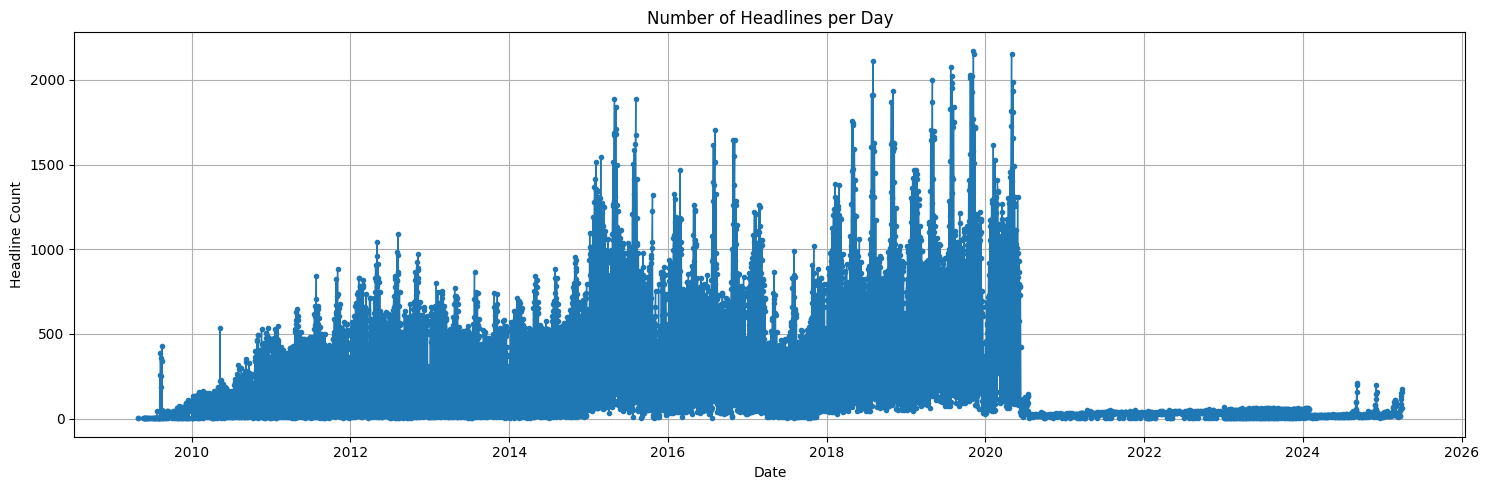

In [8]:
import matplotlib.pyplot as plt

plot_df = combined_df.copy()
plot_df["Date_only"] = plot_df["Date"].dt.date

# Count headlines per date
plot_df = plot_df.groupby("Date_only").size().reset_index(name="Headline_Count")

# Plotting
plt.figure(figsize=(15, 5))
plt.plot(plot_df["Date_only"], plot_df["Headline_Count"], marker='.', linewidth=1)
plt.title("Number of Headlines per Day")
plt.xlabel("Date")
plt.ylabel("Headline Count")
plt.grid(True)
plt.tight_layout()
plt.show()

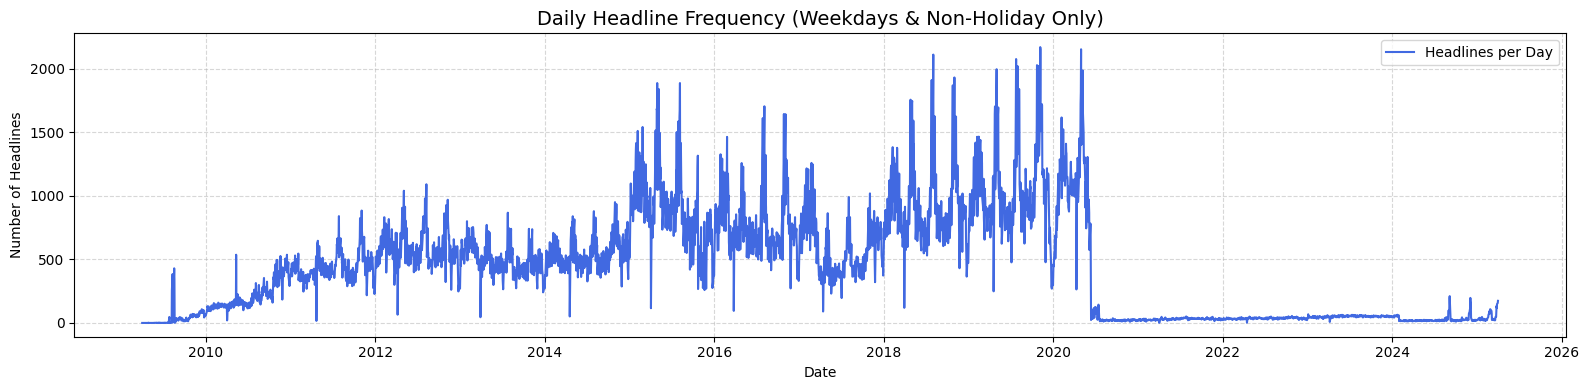

 Total missing weekday/non-holiday dates (2009-04-01 to 2025-04-01): 59
Sample missing dates: [datetime.date(2009, 4, 1), datetime.date(2009, 4, 2), datetime.date(2009, 4, 3), datetime.date(2009, 4, 6), datetime.date(2009, 4, 7), datetime.date(2009, 4, 8), datetime.date(2009, 4, 9), datetime.date(2009, 4, 10), datetime.date(2009, 4, 13), datetime.date(2009, 4, 14), datetime.date(2009, 4, 15), datetime.date(2009, 4, 16), datetime.date(2009, 4, 17), datetime.date(2009, 4, 20), datetime.date(2009, 4, 21), datetime.date(2009, 4, 22), datetime.date(2009, 4, 23), datetime.date(2009, 4, 24), datetime.date(2009, 4, 28), datetime.date(2009, 4, 30), datetime.date(2009, 5, 1), datetime.date(2009, 5, 4), datetime.date(2009, 5, 5), datetime.date(2009, 5, 6), datetime.date(2009, 5, 7), datetime.date(2009, 5, 8), datetime.date(2009, 5, 11), datetime.date(2009, 5, 12), datetime.date(2009, 5, 13), datetime.date(2009, 5, 14), datetime.date(2009, 5, 15), datetime.date(2009, 5, 18), datetime.date(2009, 5,

,Date,Headlines
0,2009-04-27 18:39:00+00:00,Update on the Luxury Sector: 2nd Quarter 2009
1,2009-04-29 12:48:00+00:00,Going Against the Herd
2,2009-05-22 18:28:00+00:00,Charles Sizemore Radio Interview Saturday Morning
3,2009-05-27 07:32:00+00:00,"JVA perks to 39% gain, SMCG ready, MRM to cont..."
4,2009-05-28 01:35:00+00:00,MRM a $15-$20+ stock - FIT new information - J...
...,...,...
1925504,2025-04-01 23:11:07+00:00,Financials Down on Tariff Anxiety -- Financial...
1925505,2025-04-01 23:25:47+00:00,Apple Stock Looks Appetizing At Current Levels...
1925506,2025-04-01 23:27:04+00:00,Nvidia (NVDA) Will Sell Everyting It Can Produ...
1925507,2025-04-01 23:33:49+00:00,Sector Update: Health Care Stocks Fall Tuesday...


In [ ]:
combined_df["Date_only"] = combined_df["Date"].dt.date

# Group by date to get daily headline count
plot_df = combined_df.groupby("Date_only").size().reset_index(name="Headline_Count")
plot_df["Date_only"] = pd.to_datetime(plot_df["Date_only"])

# Define full date range from Apr 1 2009 to Apr 1 2025
start_date = pd.to_datetime("2009-04-01")
end_date = pd.to_datetime("2025-04-01")
full_date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Remove weekends (Saturday=5, Sunday=6)
full_date_range = full_date_range[~full_date_range.weekday.isin([5, 6])]

# Remove US federal holidays
calendar = USFederalHolidayCalendar()
holidays = calendar.holidays(start=start_date, end=end_date)
full_date_range = full_date_range.difference(holidays)

# Reindex plot_df to full_date_range and fill missing with 0
plot_df = plot_df.set_index("Date_only").reindex(full_date_range, fill_value=0)
plot_df.index.name = "Date"
plot_df = plot_df.reset_index()

# Plot
plt.figure(figsize=(16, 4))
plt.plot(plot_df["Date"], plot_df["Headline_Count"], label="Headlines per Day", color="royalblue")
plt.title("Daily Headline Frequency (Weekdays & Non-Holiday Only)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Number of Headlines")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Missing dates (weekdays, non-holidays, but no headlines)
missing_dates = plot_df[plot_df["Headline_Count"] == 0]["Date"]

print(f" Total missing weekday/non-holiday dates (2009-04-01 to 2025-04-01): {len(missing_dates)}")
print("Sample missing dates:", missing_dates.dt.date.tolist())


In [10]:
plot_df.head()

,Date,Headline_Count
0,2009-04-01,0
1,2009-04-02,0
2,2009-04-03,0
3,2009-04-06,0
4,2009-04-07,0


In [13]:
combined_df.head()

,Date,Headlines,Date_only
0,2009-04-27 18:39:00+00:00,Update on the Luxury Sector: 2nd Quarter 2009,2009-04-27
1,2009-04-29 12:48:00+00:00,Going Against the Herd,2009-04-29
2,2009-05-22 18:28:00+00:00,Charles Sizemore Radio Interview Saturday Morning,2009-05-22
3,2009-05-27 07:32:00+00:00,"JVA perks to 39% gain, SMCG ready, MRM to cont...",2009-05-27
4,2009-05-28 01:35:00+00:00,MRM a $15-$20+ stock - FIT new information - J...,2009-05-28


In [ ]:

stock_keywords = {
    'AAPL': [
        'apple', 'aapl', 'iphone', 'ipad', 'macbook', 'imac', 'ios', 'macos',
        'tim cook', 'steve jobs', 'apple watch', 'airpods', 'apple music',
        'apple tv\\+', 'safari', 'apple silicon', 'm1 chip', 'm2 chip',
        'apple store', 'apple pay', 'apple arcade', 'apple inc', 'vision pro'
    ],
    'AMZN': [
        'amazon', 'amzn', 'aws', 'amazon prime', 'jeff bezos', 'andy jassy',
        'alexa', 'kindle', 'amazon web services', 'prime video',
        'amazon fulfillment', 'amazon echo', 'whole foods', 'amazon go',
        'amazon one', 'amazon pharmacy'
    ],
    'MSFT': [
        'microsoft', 'msft', 'windows', 'office 365', 'azure', 'satya nadella',
        'xbox', 'bing', 'surface', 'microsoft teams', 'microsoft edge',
        'visual studio', 'linkedin', 'powerpoint', 'microsoft 365',
        'ms excel', 'ms word', 'ms outlook', 'onedrive', 'onenote', 'copilot'
    ],
    'NVDA': [
        'nvidia', 'nvda', 'gpu', 'geforce', 'rtx', 'gtx', 'jensen huang',
        'cuda', 'dlss', 'nvidia ai', 'tensor core', 'nvidia omniverse',
        'nvidia drive', 'nvidia hopper', 'nvidia h100', 'a100', 'blackwell',
        'quadro', 'nvidia shield', 'grace hopper'
    ],
    'JNJ': [
        'johnson & johnson', 'johnson and johnson', 'jnj', 'janssen',
        'jnj vaccine', 'jnj covid', 'baby powder', 'jnj talcum',
        'jnj lawsuit', 'jnj recall', 'jnj medicine', 'jnj biotech',
        'covid vaccine', 'remsima', 'simponi', 'jnj settlement'
    ]
}

# Compile regex patterns for each stock
stock_patterns = {
    stock: re.compile(r'\b(?:' + '|'.join([re.escape(k.lower()) for k in keywords]) + r')\b')
    for stock, keywords in stock_keywords.items()
}

exploded_df = combined_df.explode('Headlines').dropna(subset=['Headlines'])
exploded_df['Headlines'] = exploded_df['Headlines'].astype(str).str.lower()


# Regex match stock symbols
def match_stocks(headline):
    matched = [stock for stock, pattern in stock_patterns.items() if pattern.search(headline)]
    return matched


# Apply matching
exploded_df['MatchedStocks'] = exploded_df['Headlines'].apply(match_stocks)

exploded_df = exploded_df[exploded_df['MatchedStocks'].map(len) > 0]


tagged_combined_headlines_df = exploded_df.explode('MatchedStocks').rename(columns={'MatchedStocks': 'Stock'})



In [15]:
tagged_combined_headlines_df.to_csv(sentiment_data_path / "targetted_combined_headlines.csv", index=False)

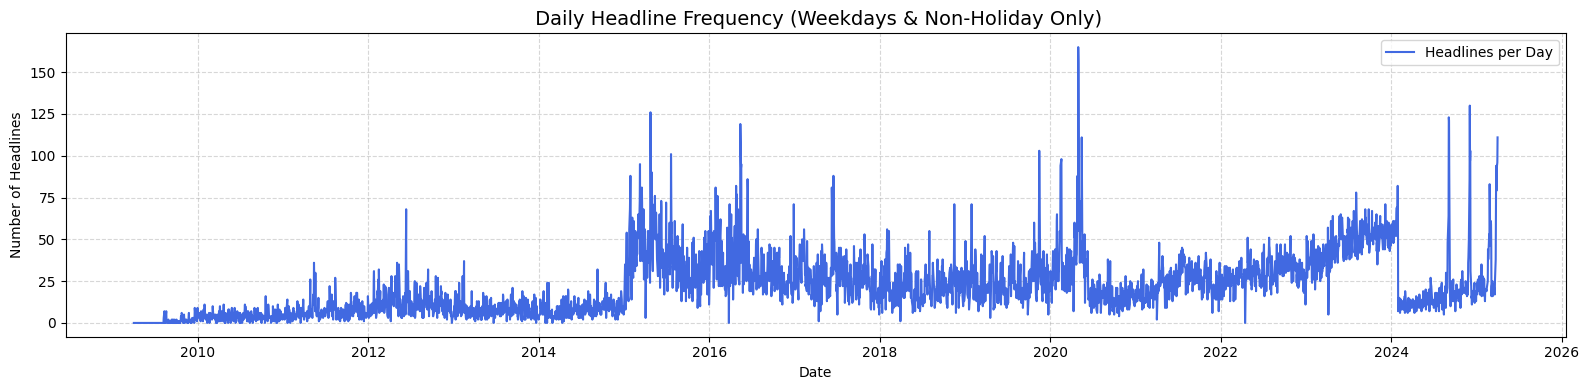

 Total missing weekday/non-holiday dates (2009-04-01 to 2025-04-01): 156
 Sample missing dates: [datetime.date(2009, 4, 1), datetime.date(2009, 4, 2), datetime.date(2009, 4, 3), datetime.date(2009, 4, 6), datetime.date(2009, 4, 7), datetime.date(2009, 4, 8), datetime.date(2009, 4, 9), datetime.date(2009, 4, 10), datetime.date(2009, 4, 13), datetime.date(2009, 4, 14), datetime.date(2009, 4, 15), datetime.date(2009, 4, 16), datetime.date(2009, 4, 17), datetime.date(2009, 4, 20), datetime.date(2009, 4, 21), datetime.date(2009, 4, 22), datetime.date(2009, 4, 23), datetime.date(2009, 4, 24), datetime.date(2009, 4, 27), datetime.date(2009, 4, 28), datetime.date(2009, 4, 29), datetime.date(2009, 4, 30), datetime.date(2009, 5, 1), datetime.date(2009, 5, 4), datetime.date(2009, 5, 5), datetime.date(2009, 5, 6), datetime.date(2009, 5, 7), datetime.date(2009, 5, 8), datetime.date(2009, 5, 11), datetime.date(2009, 5, 12), datetime.date(2009, 5, 13), datetime.date(2009, 5, 14), datetime.date(2009, 

In [16]:
tagged_combined_headlines_df["Date_only"] = tagged_combined_headlines_df["Date"].dt.date

tplot_df = tagged_combined_headlines_df.groupby("Date_only").size().reset_index(name="Headline_Count")
tplot_df["Date_only"] = pd.to_datetime(tplot_df["Date_only"])

# Define full date range from Apr 1 2009 to Apr 1 2025
start_date = pd.to_datetime("2009-04-01")
end_date = pd.to_datetime("2025-04-01")
full_date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Remove weekends (Saturday=5, Sunday=6)
full_date_range = full_date_range[~full_date_range.weekday.isin([5, 6])]

# Remove US federal holidays
calendar = USFederalHolidayCalendar()
holidays = calendar.holidays(start=start_date, end=end_date)
full_date_range = full_date_range.difference(holidays)

# Reindex plot_df to full_date_range and fill missing with 0
tplot_df = tplot_df.set_index("Date_only").reindex(full_date_range, fill_value=0)
tplot_df.index.name = "Date"
tplot_df = tplot_df.reset_index()

# Plot
plt.figure(figsize=(16, 4))
plt.plot(tplot_df["Date"], tplot_df["Headline_Count"], label="Headlines per Day", color="royalblue")
plt.title(" Daily Headline Frequency (Weekdays & Non-Holiday Only)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Number of Headlines")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Missing dates (weekdays, non-holidays, but no headlines)
missing_dates = tplot_df[tplot_df["Headline_Count"] == 0]["Date"]

print(f" Total missing weekday/non-holiday dates (2009-04-01 to 2025-04-01): {len(missing_dates)}")
print(" Sample missing dates:", missing_dates.dt.date.tolist())


In [19]:
tplot_df = pd.read_csv(sentiment_data_path / "targetted_combined_headlines.csv", parse_dates=["Date"])
tplot_df["Date"] = tplot_df["Date"].dt.date  # Strip time, keep only date
tplot_df.drop(columns=['Date_only'], inplace=True)
tplot_df.to_csv(sentiment_data_path / "targetted_combined_headlines.csv", index=False)

In [20]:
tplot_df

,Date,Headlines,Stock
0,2009-08-07,dave sawyer from microsoft and bob nolan from ...,MSFT
1,2009-08-07,study: enterprises can slash 88 percent off ap...,MSFT
2,2009-08-07,paragonreport.com complimentary market update ...,NVDA
3,2009-08-10,thefortunefinancial.com free market research o...,AAPL
4,2009-08-10,"new ""transformer(tm)"" for ipod/iphone and ""tra...",AAPL
...,...,...,...
91412,2025-04-01,amazon.com (nasdaqgs:amzn) partners with dynat...,AMZN
91413,2025-04-01,nvidia (nasdaqgs:nvda) partners with quantum m...,NVDA
91414,2025-04-01,"citi backs apple as siri delays hit shares, ai...",AAPL
91415,2025-04-01,apple stock looks appetizing at current levels...,AAPL


In [14]:
headline_counts_df = (
    tplot_df.groupby(["Date", "Stock"])
    .size()
    .reset_index(name="HeadlineCount")
)